<a href="https://colab.research.google.com/github/AparnaRameshA95/Assigmnents/blob/main/Aparna_Ramesh_A_Case_study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


**Step 2: Load the dataset**

In [ ]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


**Step 3: Data Overview**

In [ ]:
data.shape

(112, 2)

In [ ]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


**Step 4: Check the missing values**

In [ ]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [ ]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [ ]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

After checking for missing values, I found none in the dataset, so there is no need to handle any.

**Step 5: Visualization**

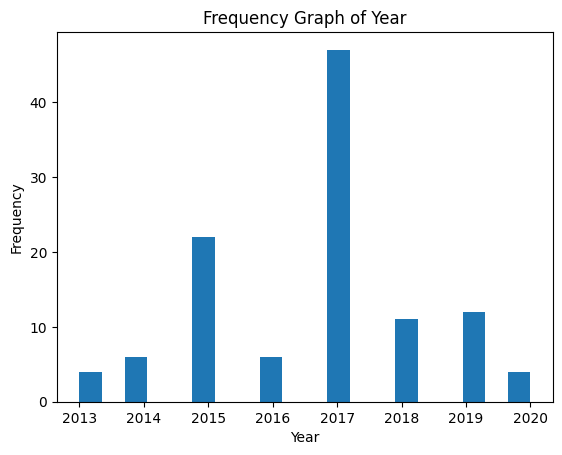

In [ ]:
plt.hist(data['Year'], bins = 20)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency Graph of Year')
plt.show()

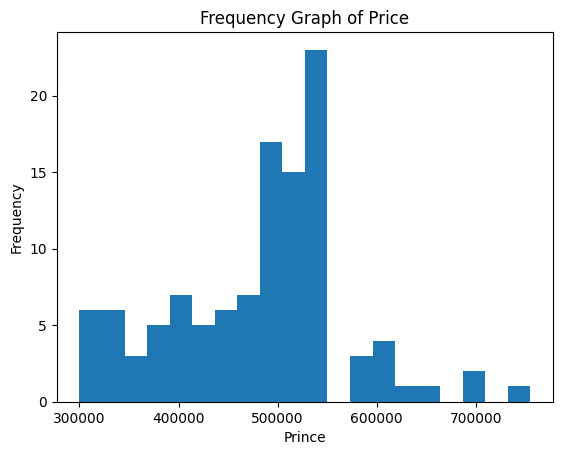

In [ ]:
plt.hist(data['Price'], bins = 20)
plt.xlabel('Prince')
plt.ylabel('Frequency')
plt.title('Frequency Graph of Price')
plt.show()

**Step 6: Outlier Checking**

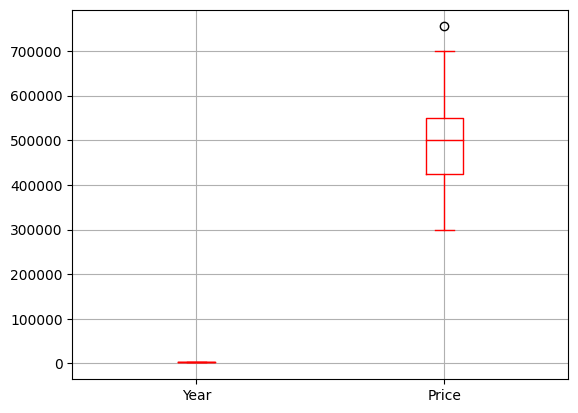

In [ ]:
# Check for outliers using boxplot
data.boxplot(color='red')
plt.show()

Here, only the price shows one outlier, so treat it.

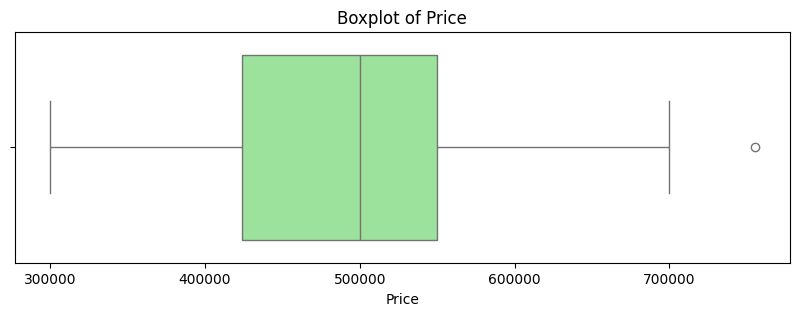

In [ ]:
# Boxplot of Price
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['Price'],color='lightgreen')
plt.title('Boxplot of Price')
plt.show()

In [ ]:
# Detecting outliers using IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outlier_lower = data['Price'] < (Q1-1.5*IQR)
outlier_upper = data['Price'] < (Q3+1.5*IQR)

In [ ]:
# Clip the outliers
clipped_price = data['Price'].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR)

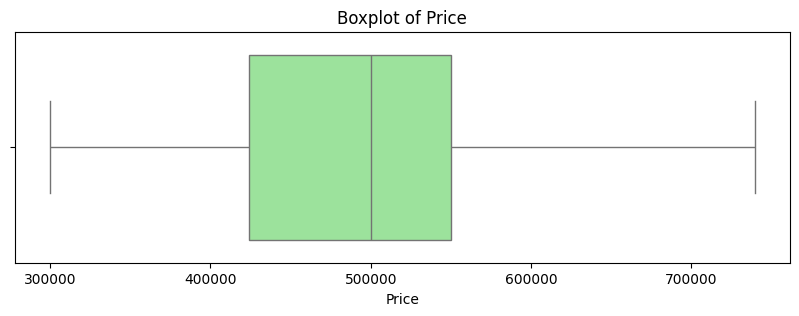

In [ ]:
# Plot the Clipped price
plt.figure(figsize=(10, 3))
sns.boxplot(x=clipped_price, color='lightgreen')
plt.title('Boxplot of Price')
plt.show()

In [ ]:
# Describe clipped_price
clipped_price.describe()


count       112.000000
mean     483726.535714
std       90810.078466
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      739375.000000
Name: Price, dtype: float64

In [ ]:
# Replacing Price by clipped_price
data['Price']=clipped_price
data

,Year,Price
0,2018,465000
1,2019,739375
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


**Step 7: Split data**

In [ ]:
# Split the data into training and testing sets
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 8: Training the model**

In [ ]:
# Train the Linear Regression model

lr = linear_model.LinearRegression()
linear_model = lr.fit(X_train,y_train)

In [ ]:
# Train the Lasso Regression model

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Predict on the test set

y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test,y_pred_linear)
linear_r2 = r2_score(y_test,y_pred_linear)

In [ ]:
# Evaluate the Lasso Regression model
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [ ]:
print(f'Linear Regression MSE: {linear_mse}')
print(f'Linear Regression R²: {linear_r2}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression R²: {lasso_r2}')

Linear Regression MSE: 4296980485.322585
Linear Regression R²: 0.3719669899056065
Lasso Regression MSE: 4296975894.993172
Lasso Regression R²: 0.37196766081356347


**Step 9: Choose the better model**

Both models have similar performance, with Lasso Regression performing slightly better in terms of MSE and R², having a lower MSE value than Linear Regression. Therefore, we will use the Lasso Regression model to predict the price of a 2022 model second-hand Hyundai Grand i10.

**Step 10: Predict the price of a 2022 model**

In [ ]:
# Prediction using Lasso regression model
price_2022 = lasso_model.predict([[2022]])

print(f'The predicted price of a 2022 model second-hand Hyundai Grand i10 is: {price_2022[0]}')

The predicted price of a 2022 model second-hand Hyundai Grand i10 is: 742466.2700041682


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
